#   **Google Playstore Apps Data Analysis and Visualization**

#### Import the important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Import the file from the provided path into a pandas data frame
df = pd.read_csv("../data/playstoreliveproj Drive FIle/playstoreliveproj/playstore_reviews.csv")

In [3]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
df.shape

(64295, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [6]:
# Describe the basic properties of the numerical columns in the dataset such as mean, median, standard deviatio(std)
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [7]:
df.shape

(64295, 5)

#### Treat the unique values in each column

In [8]:
# Get the unique values from the Sentiment Column in the table
print(df['Sentiment'].unique())

['Positive' nan 'Neutral' 'Negative']


<AxesSubplot:>

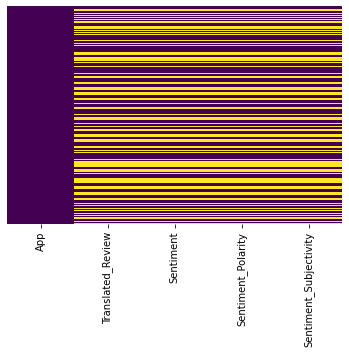

In [9]:
# Visualize the distribution of NaN data points over the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', )  

In [10]:
ind = []
ind = df[df['Sentiment'].isna() == True].index
print(ind)

Int64Index([    2,     7,    15,   102,   107,   115,   362,   368,   405,
              407,
            ...
            64285, 64286, 64287, 64288, 64289, 64290, 64291, 64292, 64293,
            64294],
           dtype='int64', length=26863)


In [11]:
df.drop(ind, inplace=True)

In [12]:
df = df.reset_index(drop = True)

<AxesSubplot:>

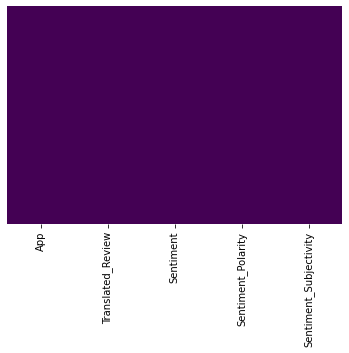

In [13]:
# Visualize the distribution of NaN data points over the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', )  

In [14]:
# Check for nan value in the Sentiment Column
print(df['Sentiment'].unique())

['Positive' 'Neutral' 'Negative']


In [15]:
# Get the unique values from the Translated Review Column in the table
df['Translated_Review'].unique().size
ind = []
ind = df[df['Translated_Review'].isna() == True].index
print(ind)

Int64Index([262, 9833, 13783, 18664, 30599], dtype='int64')


In [16]:
df.drop(ind, inplace=True)

In [17]:
df = df.reset_index(drop = True)

In [18]:
df.shape

(37427, 5)

#### 4, In app reviews dataset, remove all the rows with NaN reviews as there is no translated review present to analyze, hence these kind of data is of no use.


In [19]:
df = df.dropna()

In [20]:
df.shape

(37427, 5)

<AxesSubplot:>

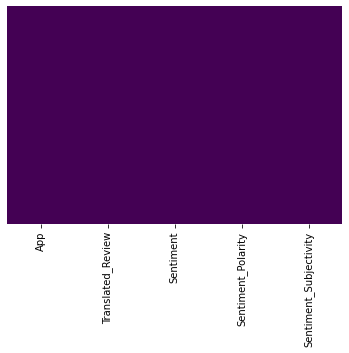

In [21]:
# Visualize the distribution of NaN data points over the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', )  

##### We now have the cleanest data

In [22]:
# Checking our work
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

c:\Users\mikyg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment_Polarity'>

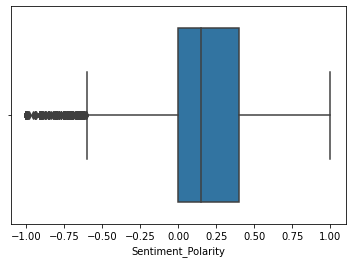

In [23]:
import seaborn as sns
sns.boxplot(df['Sentiment_Polarity'])

#### The boxplot shows that there are ouliers in our dataset how ever it used only the IQR technique which is not working for the current column since it is having value only in the range -1 to 1 as shown in the box plot so the dots shown there only tell us that these values are considerd a little far away from the Q3-Q1 Region(blue box) and should not be considered as an outlier rather the are EXTREME MINIMUMS 

c:\Users\mikyg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment_Subjectivity'>

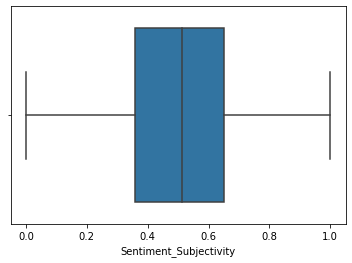

In [24]:
sns.boxplot(df['Sentiment_Subjectivity'])

In [25]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [26]:
df = df.reset_index(drop = True)

#### Subtask 4: Encoding data into suitable format


In [27]:
df.to_csv('../data/by guide/cleaned_playstore_reviews.csv')